In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("../Preprocessing/datasets/final/final_tn.csv", parse_dates=['Date'])
df = df.drop(["Unnamed: 0"], axis=1)
print(df.head())
print()
print(df.info())
print("\nMaximum number of Confirmed Cases: ", df['Confirmed'].max())
print("\nStarting date: ", df['Date'].min())
print("\nEnding date: ", df['Date'].max())

        Date State/UnionTerritory  Confirmed  new_cases      T     H
0 2020-08-03           Tamil Nadu          1        0.0  31.20  63.0
1 2020-09-03           Tamil Nadu          1        0.0  30.67  61.0
2 2020-10-03           Tamil Nadu          1        0.0  30.80  60.0
3 2020-11-03           Tamil Nadu          1        0.0  30.73  63.0
4 2020-12-03           Tamil Nadu          1        0.0  30.60  64.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  522 non-null    datetime64[ns]
 1   State/UnionTerritory  522 non-null    object        
 2   Confirmed             522 non-null    int64         
 3   new_cases             522 non-null    float64       
 4   T                     519 non-null    float64       
 5   H                     518 non-null    float64       
dtypes: datetime6

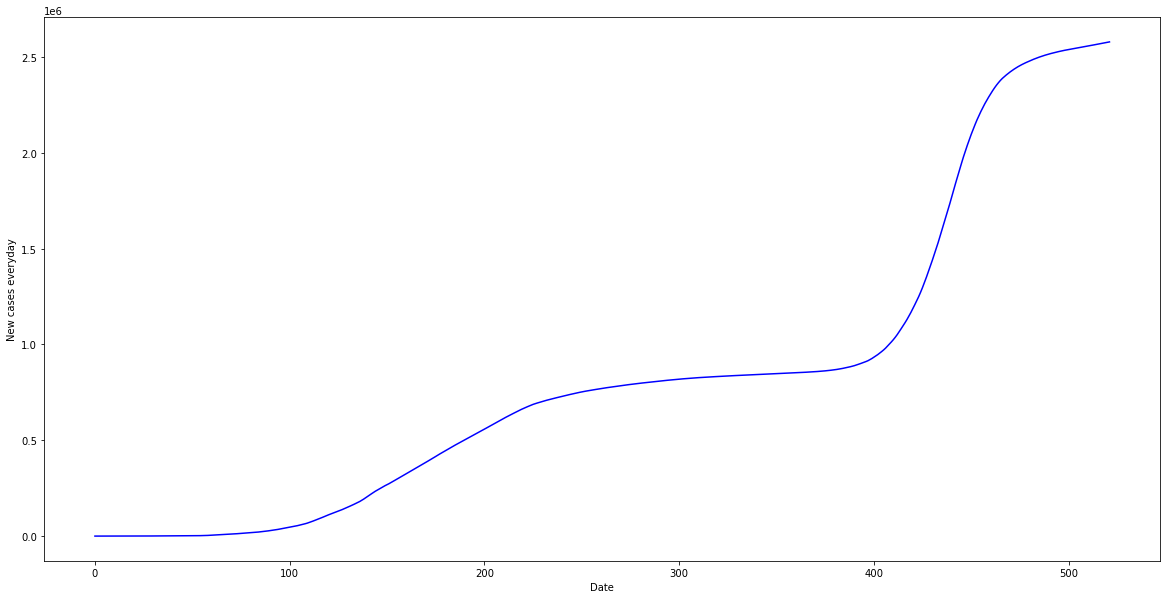

In [3]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.xlabel('Date')
plt.ylabel('New cases everyday')
plt.plot(df['Confirmed'], color="blue")
# plt.plot(df['new_cases'], color="red")
plt.show()

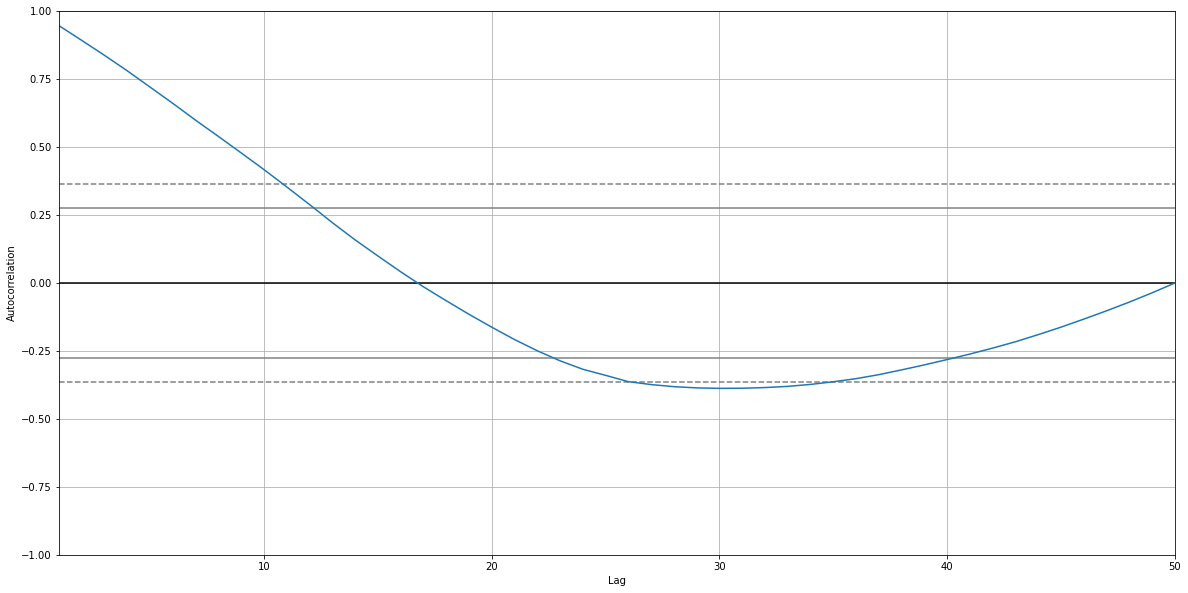

In [4]:
pd.plotting.autocorrelation_plot(df['Confirmed'][0:50])
plt.show()

In [5]:
# AdFuller test for Zero differencing

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Confirmed'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If p-value < 0.05 => No differencing required
# Else Proceed with differencing

ADF Statistic: 0.167890
p-value: 0.970402


In [6]:
# Adfuller test for One Differencing

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Confirmed'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.615621
p-value: 0.089812


In [7]:
# Adfuller test for Two Differencing

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Confirmed'].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.385269
p-value: 0.000315


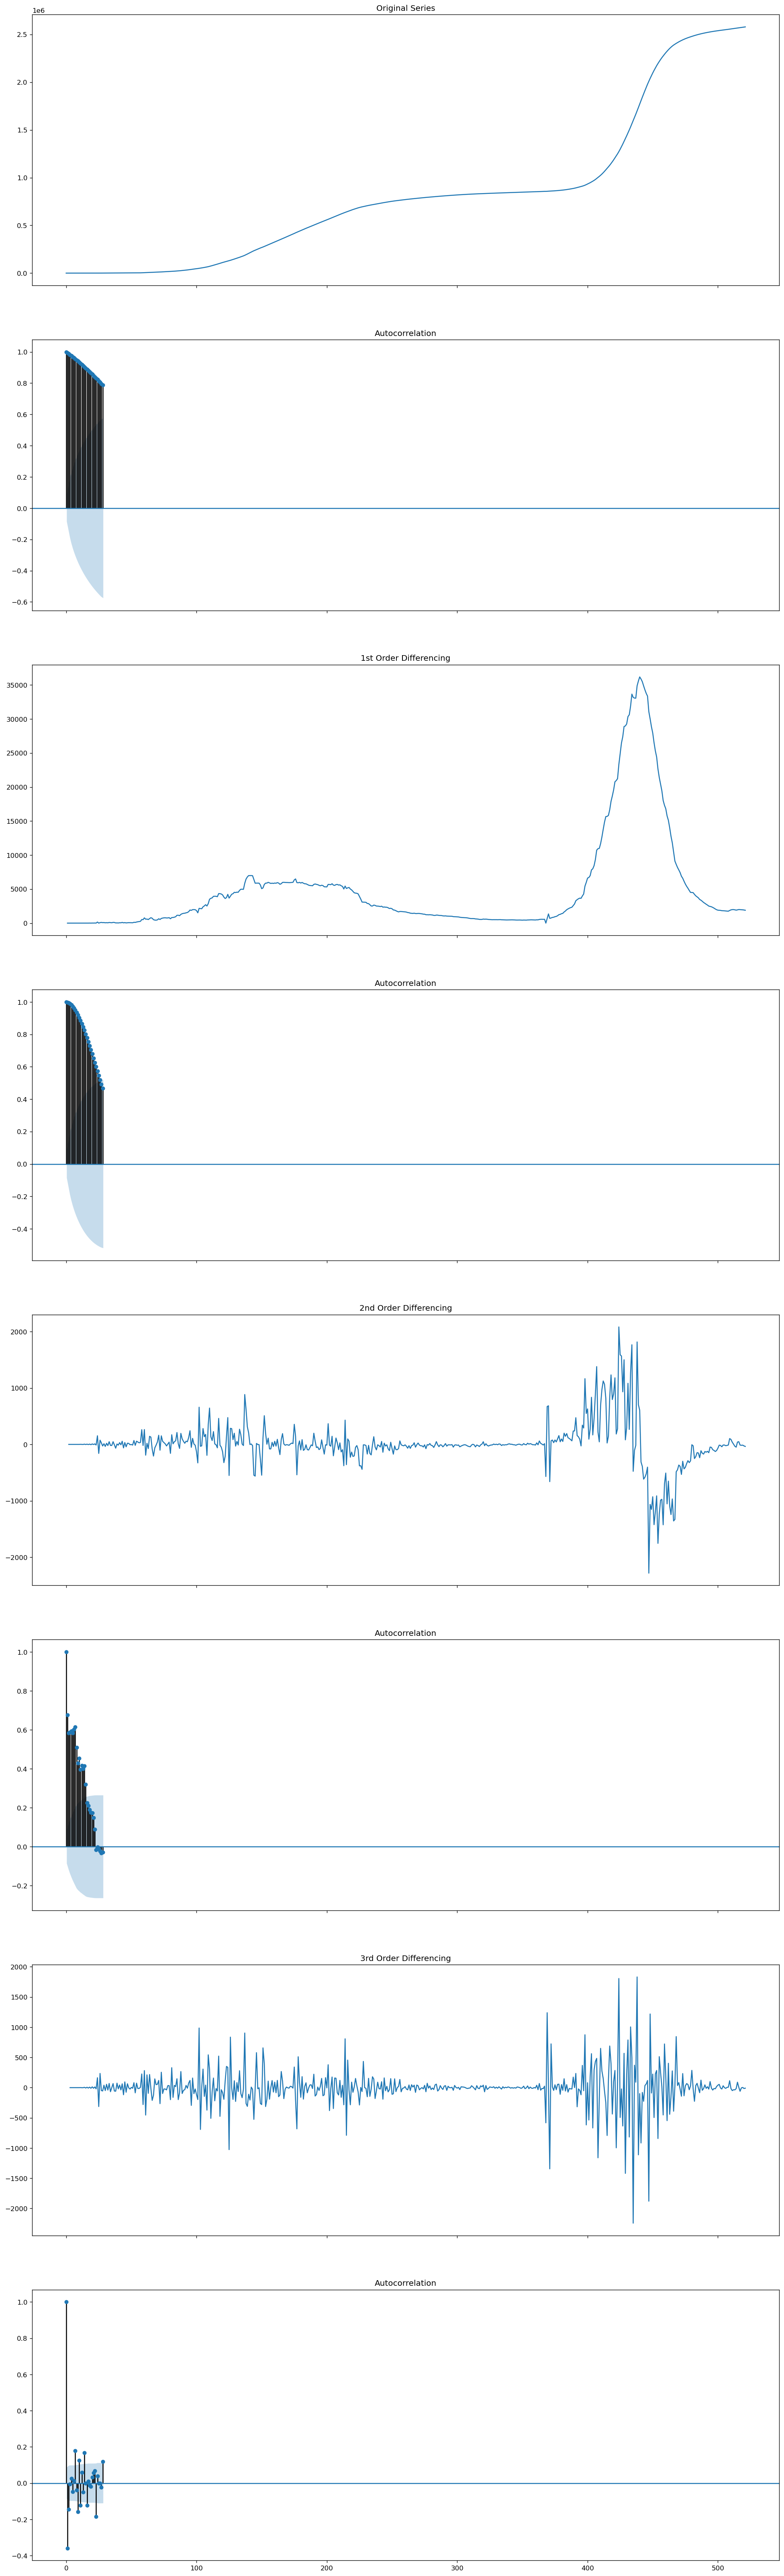

In [8]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(20,70), 'figure.dpi':120})
fig, axes = plt.subplots(8, 1, sharex=True)

# Original Series
axes[0].plot(df['Confirmed'])
axes[0].set_title('Original Series')
plot_acf(df['Confirmed'], ax=axes[1])

# 1st Differencing
axes[2].plot(df['Confirmed'].diff())
axes[2].set_title('1st Order Differencing')
plot_acf(df['Confirmed'].diff().dropna(), ax=axes[3])

# 2nd Differencing
axes[4].plot(df['Confirmed'].diff().diff())
axes[4].set_title('2nd Order Differencing')
plot_acf(df['Confirmed'].diff().diff().dropna(), ax=axes[5])

# 3rd Differencing
axes[6].plot(df['Confirmed'].diff().diff().diff())
axes[6].set_title('3rd Order Differencing')
plot_acf(df['Confirmed'].diff().diff().diff().dropna(), ax=axes[7])

plt.show()

In [9]:
from pmdarima.arima.utils import ndiffs

## Adf Test
print("ADF test: ", ndiffs(df['Confirmed'], test='adf') ) #1

# KPSS test
print("KPSS test: ", ndiffs(df['Confirmed'], test='kpss') ) #2

# PP test:
print("PP test: ", ndiffs(df['Confirmed'], test='pp')  ) #2

ADF test:  1
KPSS test:  2
PP test:  2


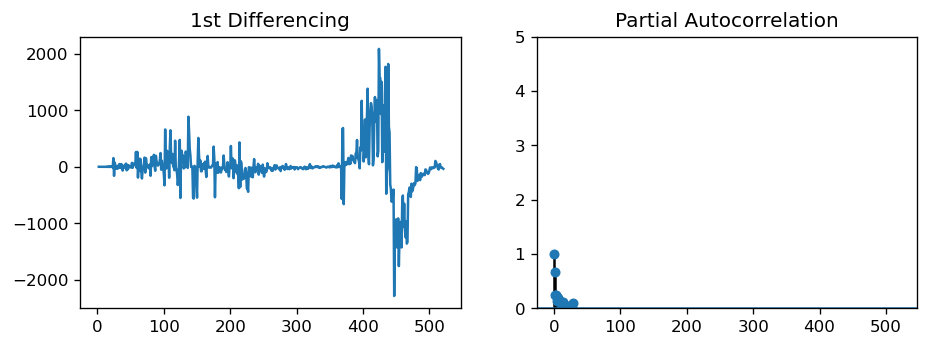

In [10]:
# To find order of AR model (p)

plt.rcParams.update({'figure.figsize':(9, 3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Confirmed'].diff().diff())
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['Confirmed'].diff().diff().dropna(), ax=axes[1])

plt.show()

In [11]:
# To find order of MA model (q)



                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                  521
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3652.020
Method:                       css-mle   S.D. of innovations            265.937
Date:                Tue, 15 Mar 2022   AIC                           7316.039
Time:                        16:39:42   BIC                           7341.574
Sample:                             1   HQIC                          7326.041
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4950.3436   1591.474      3.111      0.002    1831.112    8069.575
ar.L1.D.Confirmed     1.9723      0.010    193.300      0.000       1.952       1.992
ar.L2.D.Confirmed    -0.

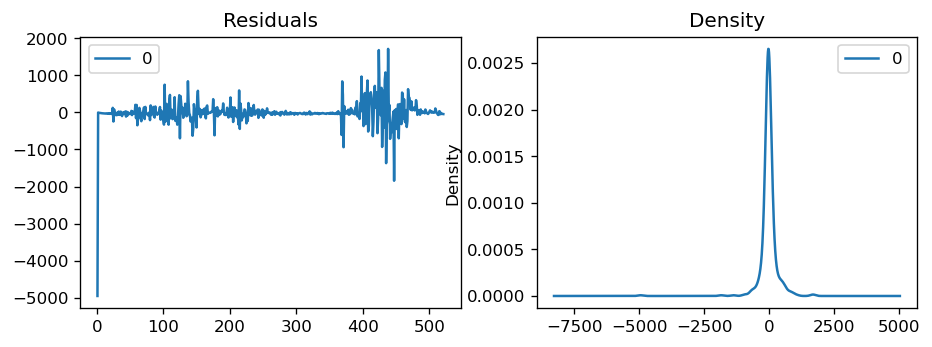

                 0
count   521.000000
mean     -8.977259
std     343.276743
min   -4950.343578
25%     -61.866517
50%     -24.822079
75%      47.883216
max    1708.605229


In [12]:
from statsmodels.tsa.arima_model import ARIMA
model_fit = None

# for i in range(1, 50):
#     try:
#         model = ARIMA(df['Confirmed'], order=(i,1,0))
#         model_fit = model.fit()
#         print(model_fit.summary())
#     except:
#         print("({}, 1, 0) did not work".format(i))

model = ARIMA(df['Confirmed'], order=(2,1,2))
# model = ARIMA(df['Confirmed'], order=(3,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
# summary stats of residuals
print(residuals.describe())

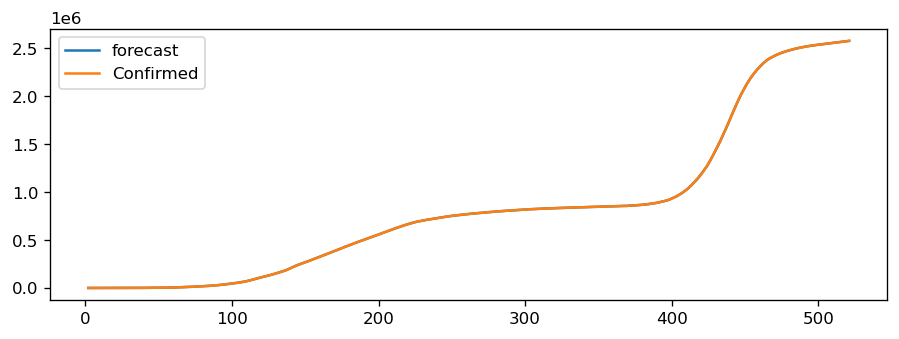

In [13]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

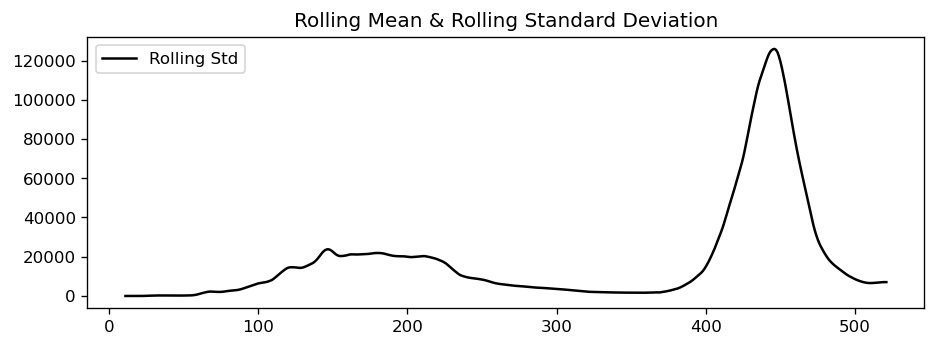

In [14]:
rolling_mean = df['Confirmed'].rolling(window = 12).mean()
rolling_std = df['Confirmed'].rolling(window = 12).std()

# plt.plot(df['Confirmed'], color = 'blue', label = 'Original')
# plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()